In [4]:
# MODELOS o paradigmas MACHINE LEARNING: https://www.youtube.com/watch?v=7saDlsTCG5o

# 1 -APRENDIZAJE SUPERVISADO (supervised learning) -> Para tareas de categorizar o Regresión lineal. Ej:support vector machine, random force models, naive Bayes models. Usara datos de entrenamiento previamente bien categorizados
# 2 -APRENDIZAJE REFORZADO (Reinforcement learning) -> Tareas sin etiquetas, funciona por puntuaciones (cuantos pasos tardaste para salir del laberinto). Ej: Monte Carlo, evolutionary algorithms, time series
# 2 -APRENDIZAJE NO SUPERVISADO (unsupervised learning) -> la IA ha de buscar patrones que un humano desconoce. Ej: clustering, k-means, reglas de asociación. No hay datos de entrenamiento
# 3 -Deep learning

#Fases:
# 1-Hipotesis: examinar datos, hacer estadisticas, determinar que buscamos
# 2-Processing: scaling(transformar datos a rangos de escala similar). PCA (Principal Component Analysis)
# 3-Parameters: Learning rate, cost function
# 4-Training: Data splitting method
# 5-Testing: Model learning accuracy/assessment

#Overfiting: cuando un algoritmo esta sobreentrenado y no es capaz de generalizar.

#Metodos de entrenamiento:
#Split-validation. Partir el dataset en 70/30. 70% para training, 30% para evaluacion
#LOOCV: Leave-one-out-cross-validation: train con tod menos la última row. Ultima row para test
#K-Fold: 80% training, 20% testing. 5 Fold evaluation: Cada row se entrena 4 veces y testea 1. 

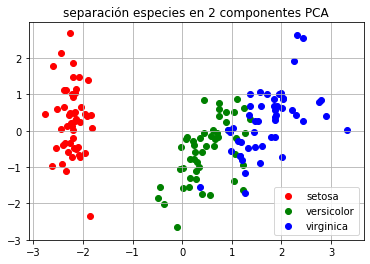

In [22]:
#en este ejemplo pasaremos de 4 columnas a 2 para ver si con ello somos capaces de separar bien las 3 especies
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

iris = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv")

x = iris.drop("species", axis=1) #a la x se le suele llamar 'data'. Con drop, eliminamos la columna species
y = iris["species"] #a la y se le suele llamar 'target'

x = StandardScaler().fit_transform(x) #convierte todos los valores a z-score. Es lo que se llama "scaling", revisa los valores y muestra cuanto distan de la media

pca = PCA(n_components=2) #pasamos de 4 columnas a 2 para ver
pCs = pca.fit_transform(x)

dataFrame = pd.DataFrame(data = pCs, columns= ['Componente1','Componente2'])
dataFrame = pd.concat([dataFrame,y], axis =1) #añadimos el target (eje 'y')

fig=plt.figure()
axis = fig.add_subplot(1,1,1)
axis.set_title('separación especies en 2 componentes PCA')
species= ['setosa', 'versicolor', 'virginica']
colors = ['r','g','b']
for target, color in zip(species,colors):
    indices = dataFrame['species'] == target
    axis.scatter(dataFrame.loc[indices,'Componente1'], dataFrame.loc[indices, 'Componente2'], c=color)
axis.legend(species)
axis.grid()

#el resultado que vemos es que separamos bien setosa del resto, pero no hay un límite claro entre versicolor y virginica

In [15]:
##Cross-validation & Scoring

import pandas as pd
from sklearn import svm, metrics #svm=support vector machine
from sklearn.preprocessing import MinMaxScaler #otro tipo de Scaler da valores de 0 a 1, es el percentile
from sklearn.model_selection import KFold, cross_val_score, LeaveOneOut

iris = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv")

x = iris.drop("species", axis=1) #a la x se le suele llamar 'data'
y = iris["species"] #a la y se le suele llamar 'target'

x = MinMaxScaler().fit_transform(x)

#metodo1: K-Fold 80% training, 20% testing. 5 Fold evaluation: Cada row se entrena 4 veces y testea 1.
svc = svm.SVC(kernel='linear', C=1, gamma='auto')
k_fold = KFold(n_splits=5)
results= cross_val_score(svc, x, y, cv=k_fold)
results #devuelve un array de 5 folds, uno por cada intento

#metodo2: LOOCV: Leave-one-out-cross-validation: train con tod menos la última row. Ultima row para tes
loo = LeaveOneOut()
for train_index, test_index, in loo.split(x):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    svc.fit(x_train,y_train)
    y_pred = svc.predict(x_test)
    acc = metrics.accuracy_score(y_test, y_pred) #compara la predicha con la real, será 1 si acerto, 0 si fallo
    print(acc)

1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


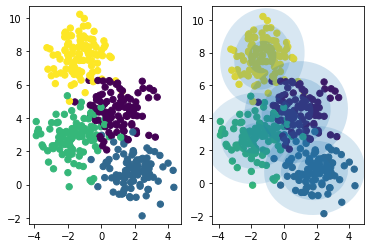

In [104]:
##GMMs and Visualizing Clusters: otro método de aprendizaje NO supervisado

# Generaremos 400 muestras aleatorias en 4 blobs (conjuntos), el objetivo es encontrar los límites de esos conjuntos agrupandolos en clusters

import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse #herramienta para la representacion Gausiana
import numpy as np
from sklearn.datasets.samples_generator import make_blobs #generador de datos aleatorios
import sklearn.mixture as gmm

#1-Generamos datos de ejemplo
X,y_true = make_blobs(n_samples=400, centers=4, cluster_std=1, random_state=0) #quiero 400 datos en 4 blobs.
model = gmm.GaussianMixture(n_components=4, warm_start=False, init_params='kmeans') #https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html
model.fit(x) #hacemos ek fit sin el valor Y porque no sabemos cual es

#2-Dibujamos dos plots, los datos sin procesar y una vez calculados los clusters
plt.subplot(1,2,1) #1 row, 2 column
plt.scatter(X[:,0], X[:,1], c=y_true, s=40, cmap='viridis')
plt.axis('equal')

plt.subplot(1,2,2)
ax= plt.gca()
ax.scatter(X[:,0], X[:,1], c=y_true, s=40, cmap='viridis')
ax.axis('equal')

#3-Visualizamos los clusters (limites de los blobs)
w_factor = 0.2 / model.weights_.max()
for pos, covar, weights in zip(model.means_, model.covariances_, model.weights_):
    U, s, vt = np.linalg.svd(covar) #dimensionality reduction
    angle = np.degrees(np.arctan2(U[1,0], U[0,0]))
    width, height = 2 * np.sqrt(s)

    #pintar la elipse
    for center in range(1,4): #que dibuje 4 areas de probabilidad por cluster
        ax.add_patch(Ellipse(pos, center*width, center*height, angle, alpha=weights*w_factor))
plt.show()

In [109]:
##PROBLEMA
#1-Cargar IRIS
#2-Scalar/normalizes training data
#3-Reduce dimensionality using PCA
#4-Splits processed data into a K-Folds
#5-Determine how neighbours and folds are required for highest accuracy

from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.decomposition import PCA
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


#1-Cargar IRIS
iris=datasets.load_iris()
x = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.DataFrame(iris.target, columns=["species"], dtype='category')


#2-Scalar/normalizes training data
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x) #escalamos en x en y no tiene sentido


#3-Reduce dimensionality using PCA
pca = PCA(n_components=2, random_state=0) #reducimos a dos componentes
pCs = pca.fit_transform(x_scaled) #pCs 'principal Components' es una lista con dos componentes
x_scaled = pd.DataFrame(data=pCs, columns = ['PC1', 'PC2'])
x_scaled = pd.concat([x_scaled, y], axis=1)


#4-Splits processed data into a K-Folds
kf = KFold(n_splits=5)
kf.get_n_splits(x)


#5-Determine how neighbours and folds are required for highest accuracy
intentos = 1
for train_index, test_index in kf.split(x):
    x_train = x_scaled.iloc[train_index,:]
    y_train = y.iloc[train_index,:]
    x_test = x_scaled.iloc[test_index,:]
    y_test = y.iloc[test_index,:]
    
    for K in range(1,11):
        kNR = KNeighborsRegressor(n_neighbors=K)
        kNR.fit(x_train, y_train)
        score = kNR.score(x_test,y_test)
        print("Intento número: %s, Neighbors: %s, Score: %s" % (intentos, K, score))
        
    intentos+=1

#Interpretar resultado: 
# 1st intento: el resultado es 1 = perfecto, es lo normal.
# 2nd intento: 50% training, 50% test asi 1ue 50%->1 y el 50% test el scoring baja
# 3rd intento: scoring muy malo, no es capaz de hacer clusters
# 4th intento: split en 75/25 va mejorando
# 5th intento: 50% OK, 50% NOK

#En el primero intento hay overfitting, es todo entrenamiento por lo que el scoring es perfecto

Intento número: 1, Neighbors: 1, Score: 1.0
Intento número: 1, Neighbors: 2, Score: 1.0
Intento número: 1, Neighbors: 3, Score: 1.0
Intento número: 1, Neighbors: 4, Score: 1.0
Intento número: 1, Neighbors: 5, Score: 1.0
Intento número: 1, Neighbors: 6, Score: 1.0
Intento número: 1, Neighbors: 7, Score: 1.0
Intento número: 1, Neighbors: 8, Score: 1.0
Intento número: 1, Neighbors: 9, Score: 1.0
Intento número: 1, Neighbors: 10, Score: 1.0
Intento número: 2, Neighbors: 1, Score: 1.0
Intento número: 2, Neighbors: 2, Score: 1.0
Intento número: 2, Neighbors: 3, Score: 1.0
Intento número: 2, Neighbors: 4, Score: 1.0
Intento número: 2, Neighbors: 5, Score: 1.0
Intento número: 2, Neighbors: 6, Score: 1.0
Intento número: 2, Neighbors: 7, Score: 0.9969387755102039
Intento número: 2, Neighbors: 8, Score: 0.99765625
Intento número: 2, Neighbors: 9, Score: 0.9925925925925926
Intento número: 2, Neighbors: 10, Score: 0.9849999999999999
Intento número: 3, Neighbors: 1, Score: 1.0
Intento número: 3, Nei